In [19]:
import numpy as np
import anndata
import os
import sys
import scipy
import re
import matplotlib.pyplot as plt


In [2]:
adata = anndata.read_h5ad("../../../../../pipeline42/datasets/TabulaSapiens/normalized/TS_Liver.h5ad")

In [4]:

######## Global Variables ############

### Gene Names
gene_symbols = adata.var.gene_symbol


### Num Cells


### Cell Types
#Larger compartments
#cell_types = adata.obs.compartment.unique()
cell_types = adata.obs.cell_ontology_class.unique()


### Organism_Part
organism_part = adata.obs.organ_tissue.unique()[0]



In [5]:
def sum_UMIs_per_cell(adata):
    X_counts_UMIs = [np.sum(adata[cell_index].X) for cell_index in range(adata.shape[0])]
    return np.array(X_counts_UMIs)

X_counts_UMIs = sum_UMIs_per_cell(adata)

Text(0, 0.5, 'count')

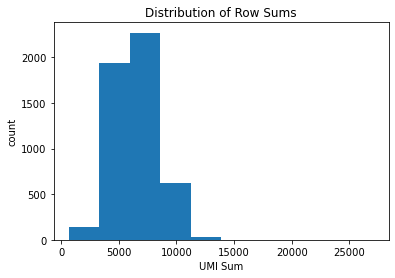

In [24]:
plt.hist(X_counts_UMIs)
plt.title("Distribution of Row Sums")
plt.xlabel("UMI Sum")
plt.ylabel("count")

In [6]:
adata.obs['X_counts_UMIs'] = X_counts_UMIs


In [9]:

assert len(X_counts_UMIs) == adata.shape[0]
assert np.sum(adata[0].X) == X_counts_UMIs[0]
assert np.sum(adata[adata.shape[0]-1].X) == X_counts_UMIs[adata.shape[0]-1]

In [10]:
def normalize_UMIs(adata):
    """
    Requires adata.obs to contain X_counts_UMIs
    
    Normalize adata.X by deviding it by the indexed value of X_counts_UMIs

    Adds depth_normed layer to adata and saves to disk

    Adds pseudocount of +1 to both sides of division
    """
    depth_normed_layer = []
    for i, cell in enumerate(adata):
        depth_normed_cell = (adata.X[i]) / (adata.obs.X_counts_UMIs[i])

        depth_normed_layer.append(depth_normed_cell)

    sparse_normed_layer = scipy.sparse.vstack(blocks = depth_normed_layer)
    
    adata.layers['depth_normalized'] = sparse_normed_layer

    return None
depth_normed = normalize_UMIs(adata)

In [11]:
assert adata.layers['depth_normalized'].shape[0]>0
assert len(adata.layers['depth_normalized'][0].toarray()[0]) == adata.shape[1]


In [12]:
adata.layers['depth_normalized']

<5007x58870 sparse matrix of type '<class 'numpy.float64'>'
	with 12047253 stored elements in Compressed Sparse Row format>

In [15]:
adata.X

<5007x58870 sparse matrix of type '<class 'numpy.float32'>'
	with 12047253 stored elements in Compressed Sparse Row format>